# Innomatics_intership_project

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading given csv file 
df = pd.read_csv(r"C:\Users\User\Desktop\data.csv")
#looking at first 5 rows
df.head(5)

In [3]:
#analysing the shape of given data
print(df.columns)
df.shape

(2227, 3)

In [4]:
df.describe()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


# checking for missing values and dropping them

In [ ]:
# Looking for missing values
df.isnull().sum()

In [ ]:
missing_values = ["NA","n/a", "na", "--"]
df = pd.read_csv(r"C:\Users\User\Desktop\data.csv", na_values = missing_values)

In [ ]:
df.isnull().sum()

In [ ]:
new_df=df.dropna()

In [ ]:
new_df.isnull().sum()

# Analysing data by visualization

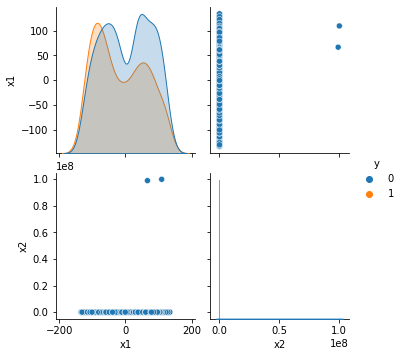

In [6]:

sns.pairplot(df, hue= "y")

In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# Treatment of outliers , replacing with zero

<AxesSubplot:xlabel='x1'>

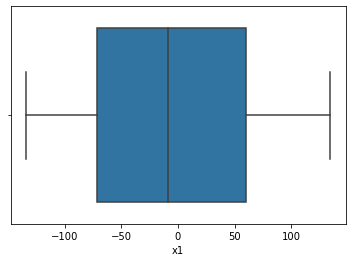

In [11]:
sns.boxplot(x='x1',data=df)

<AxesSubplot:xlabel='x2'>

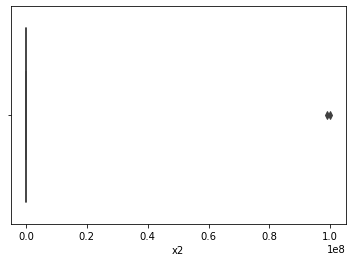

In [12]:
sns.boxplot(x='x2',data=df)

In [13]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x1'])

Outliers: []


In [14]:
import numpy as np
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['x2'])

Outliers: [99009998.0, 99999999.0]


In [15]:
#Zero value imputation
q1 = df['x2'].quantile(0.25)
q3 = df['x2'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df['x2']:
    if i > Upper_tail or i < Lower_tail:
            df['x2'] = df['x2'].replace(i, 0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

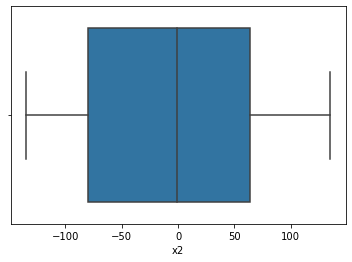

In [16]:
sns.boxplot(df['x2'])

In [17]:
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

# Train-Test split

In [18]:
X = df.drop('y',axis = 1)#X=data

In [19]:
y= df['y']

In [20]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2227, 2)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(standardized_data,y,train_size=0.8,random_state=0)

In [23]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1781, 2) (1781,)
(446, 2) (446,)


# Checking the Logistic model

<h5>Hyper-parameter tuning</h5>

In [24]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]
acc = ['accuracy','precision','recall']                    
for i in acc:                   
    clf = RandomizedSearchCV( LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'penalty': 'l2', 'C': 4}
LogisticRegression(C=4)
0.7331838565022422
Best parameters set found on train set:
for precision
{'penalty': 'l2', 'C': 8}
LogisticRegression(C=8)
0.967032967032967
Best parameters set found on train set:
for recall
{'penalty': 'l2', 'C': 9}
LogisticRegression(C=9)
0.43137254901960786


<h5>Training the model</h5>

In [66]:
classifier = LogisticRegression(penalty='l2',C=8)
classifier.fit(x_train, y_train)

LogisticRegression(C=8)

<h5>Predict</h5>

In [67]:
y_test_predict=classifier.predict(x_test)

In [68]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [69]:
temp_data.head()

,y_test,y_test_pred
1161,0,0
1993,0,0
148,1,0
776,1,1
2124,0,0


<h5> Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [70]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7331838565022422
0.967032967032967
0.709487927402366
0.5966101694915255
0.43137254901960786


In [32]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[239,   3],
       [116,  88]], dtype=int64)

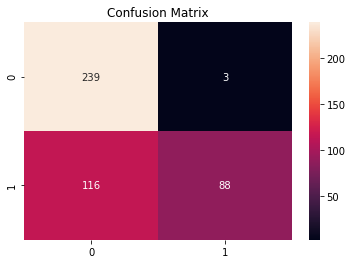

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the KNN model

<h5>Hyper-parameter tuning</h5>

In [34]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [35]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1, 2, 3]}]
acc = ['accuracy','precision','recall']                    
for i in acc: 
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)

    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'p': 1, 'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9, p=1)
0.9618834080717489
Best parameters set found on train set:
for precision
{'p': 3, 'n_neighbors': 8}
KNeighborsClassifier(n_neighbors=8, p=3)
0.9792746113989638
Best parameters set found on train set:
for recall
{'p': 2, 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)
0.9264705882352942


<h5>Training the model </h5>

In [36]:
classifier = KNeighborsClassifier(n_neighbors=4,p=1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

<h5>Predict</h5>

In [37]:
y_test_predict=classifier.predict(x_test)

In [38]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [39]:
temp_data.head()

,y_test,y_test_pred
1161,0,0
1993,0,0
148,1,0
776,1,1
2124,0,0


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve
</h5>

In [40]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9506726457399103
0.9739583333333334
0.9480027548209365
0.9444444444444444
0.9166666666666666


In [41]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[237,   5],
       [ 17, 187]], dtype=int64)

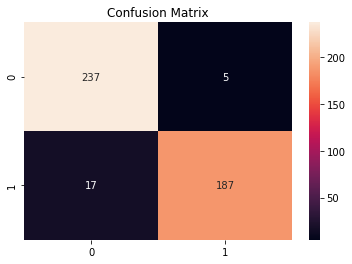

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the DECISION TREE model

<h5>Hyper-parameter tuning</h5>

In [43]:
# Necessary imports 
from scipy.stats import randint 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# Creating the hyperparameter grid  
evaluation_metric=['accuracy','precision']
param_dist = {"max_depth": [3, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
# Instantiating RandomizedSearchCV object
for i in evaluation_metric:
  tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5,scoring='{}'.format(i))
  print('for {}'.format(i))
  tree_cv.fit(x_train, y_train) 
# Print the tuned parameters and score 
  print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
  print("Best score is {}".format(tree_cv.best_score_))

for accuracy
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.9382321467913007
for precision
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 6}
Best score is 0.9411645884867148


<h5>Training the model</h5>

In [45]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=2,min_samples_leaf=7)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2, min_samples_leaf=7)

<h5>Predict</h5>

In [46]:
y_test_predict=classifier.predict(x_test)

In [47]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [48]:
temp_data.head()

,y_test,y_test_pred
1161,0,0
1993,0,0
148,1,0
776,1,1
2124,0,0


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [49]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9484304932735426
0.9414634146341463
0.9482458272565224
0.9437652811735942
0.946078431372549


In [50]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[230,  12],
       [ 11, 193]], dtype=int64)

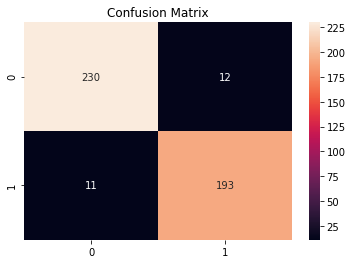

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Checking the 'SVM'

<h5>Hyper-parameter tuning</h5>

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [53]:
evaluation_metric=['accuracy']
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(x_train, y_train)
    print("Best parameters set found on train set:")
    print('for {}'.format(i))
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()
    print(clf.score(x_test, y_test))

Best parameters set found on train set:
for accuracy
{'kernel': 'rbf', 'gamma': 0.4008588856248989, 'C': 100}
SVC(C=100, gamma=0.4008588856248989)

0.952914798206278


<h5>Training the model with kernel-RBF </h5>

In [54]:
clf = SVC(kernel='rbf',C=1000)  
clf.fit(x_train,y_train)

SVC(C=1000)

<h5>Predict</h5>

In [55]:
y_test_predict=clf.predict(x_test)

In [56]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [57]:
temp_data.head()

,y_test,y_test_pred
1161,0,0
1993,0,0
148,1,0
776,1,1
2124,0,0


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [58]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.9506726457399103
0.955
0.9495422135796467
0.9455445544554456
0.9362745098039216


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[233   9]
 [ 13 191]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       242
           1       0.95      0.94      0.95       204

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



In [71]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[239,   3],
       [116,  88]], dtype=int64)

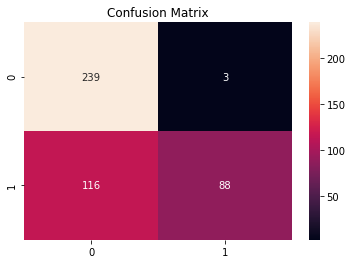

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

<h5>Training the model with Kernel-Linear</h5>

In [60]:
clf = SVC(kernel='linear',C=1000)  
clf.fit(x_train,y_train)

SVC(C=1000, kernel='linear')

<h5>Predict</h5>

In [61]:
y_test_predict=clf.predict(x_test)

In [62]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [63]:
temp_data.head()

,y_test,y_test_pred
1161,0,0
1993,0,0
148,1,0
776,1,1
2124,0,0


<h5>Evaluation-using accuracy,confusion matrix,recall,precision,f1score,ROC-AUC curve</h5>

In [74]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_predict))
print(metrics.precision_score(y_test,y_test_predict))
print(metrics.roc_auc_score(y_test,y_test_predict))
print(metrics.f1_score(y_test,y_test_predict))
print(metrics.recall_score(y_test,y_test_predict))

0.7331838565022422
0.967032967032967
0.709487927402366
0.5966101694915255
0.43137254901960786


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[239   3]
 [116  88]]
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       242
           1       0.97      0.43      0.60       204

    accuracy                           0.73       446
   macro avg       0.82      0.71      0.70       446
weighted avg       0.81      0.73      0.71       446



In [76]:
con_metric = metrics.confusion_matrix(y_test, y_test_predict)
con_metric

array([[239,   3],
       [116,  88]], dtype=int64)

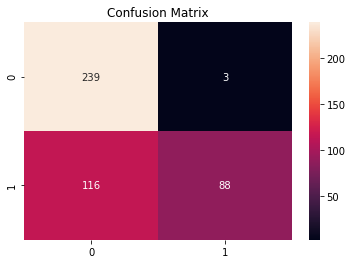

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

<h5>Conclusion</h5>

<h10>After training the dataset with the given Machine Learning model's : <br>
Looking at the confusion matrix, I came to know that KNN-with 97 percent and DecisionTree-with 94 percent stands best models for the given dataset.</h10>